In [1]:
import numpy as np, math, networkx as nx
import matplotlib.pyplot as plt

# from bokeh.io import show, output_file, output_notebook
# from bokeh.plotting import figure
# from bokeh.models import GraphRenderer, StaticLayoutProvider, Oval, Circle
# from bokeh.palettes import Spectral8
# from bokeh.models.graphs import from_networkx
# output_notebook()

file = 'weighted_person-person_projection_anonymous_combined.graphml'
g = nx.read_graphml(f'../Graphs/{file}')
Gc = max(nx.connected_component_subgraphs(g), key=len)

In [3]:
deg = nx.degree(Gc, weight = 'weight')

(7452,) (20442,)
(703,)
> 703


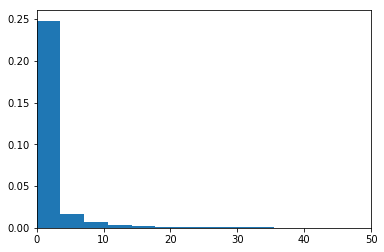

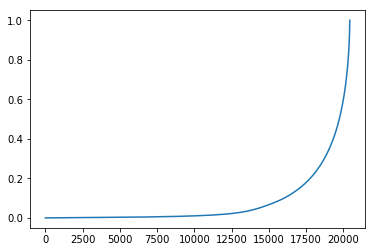

In [4]:
w = np.fromiter(dict(deg).values(), dtype = float)

# bins = np.linspace(0, w.max(), 50)

fig, ax = plt.subplots()
ax.hist(w, bins = 100, density  = 1)
ax.set_xlim(0, 50)
b = w.copy()
fig, ax = plt.subplots()
c =np.sort(b).cumsum() 
c /= c.max()
idx = np.argmin(abs(c - .5))
theta = np.sort(b)[idx]
ax.plot(c / c.max())
print(np.unique(w).shape, w.shape)

print(np.where(b > theta)[0].shape)

idx = []
for node in Gc:
    if Gc.degree(node, weight = 'weight') > theta:
        idx.append(node)
gg = Gc.subgraph(idx)

print('>', gg.number_of_nodes())

In [10]:
tmp = max(nx.connected_component_subgraphs(gg), key = len)
pos = nx.spring_layout(tmp, dim = 2, weight = 'weight')
# pos = nx.nx_agraph.graphviz_layout(tmp, prog='neato', args='')
# pos = nx.planar_layout(nx.planarity.PlanarEmbedding(tmp))

d   = np.array(list(dict(pos).values()))
a, b= d.max(0), d.min(0)
a *= 1
b *= 1

dd = np.array(list(dict(tmp.degree()).values()))
m, n = dd.min(), dd.max()

for i, j in tmp.edges():
    tmp[i][j]['edge_alpha'] = max((tmp[i][j]['weight'] - m) / (n - m), .05)
    tmp[i][j]['edge_color'] = 'red' if tmp[i][j]['weight'] < 0 else 'green'



In [9]:
from bokeh.models import MultiLine
from bokeh.palettes import Spectral4
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
p = figure(x_range = (b[0], a[0]), y_range = (b[1], a[1]))

p.add_tools(HoverTool(tooltips = None), TapTool(), BoxSelectTool())
graph = from_networkx(tmp, pos)

graph.node_renderer.glyph = Circle(size = 5, fill_color = Spectral4[0])
graph.node_renderer.selection_glyph = Circle(size=105, fill_color=Spectral4[2])
graph.node_renderer.hover_glyph = Circle(size=5, fill_color=Spectral4[1])
graph.edge_renderer.glyph = MultiLine(line_alpha = 'edge_alpha', line_color = 'edge_color')

graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = EdgesAndLinkedNodes()
p.renderers.append(graph)
show(p)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
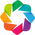

:Graph   [start,end]


In [30]:
from holoviews.operation.datashader import datashade, bundle_graph
import holoviews as hv
hv.extension('bokeh')
d = hv.Graph(tmp.edges())

print(d)
# bundled = bundle_graph(d)
# bundled.

In [30]:
# from datashader.bundling import connect_edges, hammer_bundle
# import datashader as ds
# from datashader.layout import random_layout, circular_layout, forceatlas2_layout
# # (\
# #  datashade(\
# #            bundled, normalization = 'log',\
# #            muted_fill_color = 'white').opts() *\
# #  bundled.nodes.opts(size = 10, selection_color = 'white')
# #  bundled.select(circle='circle15').opts(node_fill_color='white').opts(tools = [])
# # ).opts(width = 700, height = 700)

# import pandas as pd
# cvsopts = dict(plot_height=400, plot_width=400)
# def edgesplot(edges, name=None, canvas=None):
#     canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
#     return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)

# def nodesplot(nodes, name=None, canvas=None, cat=None):
#     canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
#     aggregator=None if cat is None else ds.count_cat(cat)
#     agg=canvas.points(nodes,'x','y',aggregator)
#     return tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3, name=name)

# def graphplot(nodes, edges, name="", canvas=None, cat=None):
#     if canvas is None:
#         xr = nodes.x.min(), nodes.x.max()
#         yr = nodes.y.min(), nodes.y.max()
#         canvas = ds.Canvas(x_range=xr, y_range=yr, **cvsopts)

#     np = nodesplot(nodes, name + " nodes", canvas, cat)
#     ep = edgesplot(edges, name + " edges", canvas)
#     return tf.stack(ep, np, how="over", name=name)

# def nx_layout(graph):
#     layout = nx.circular_layout(graph)
#     data = [[node]+layout[node].tolist() for node in graph.nodes]

#     nodes = pd.DataFrame(data, columns=['id', 'x', 'y'])
#     nodes.set_index('id', inplace=True)

#     edges = pd.DataFrame(list(graph.edges), columns=['source', 'target'])
#     return nodes, edges

# def nx_plot(graph, name=""):
#     print(graph.name, len(graph.edges))
#     nodes, edges = nx_layout(graph)

#     direct = connect_edges(nodes, edges)
#     bundled_bw005 = hammer_bundle(nodes, edges)
#     bundled_bw030 = hammer_bundle(nodes, edges, initial_bandwidth=0.30)

#     return [graphplot(nodes, direct,         graph.name),
#             graphplot(nodes, bundled_bw005, "Bundled bw=0.05"),
#             graphplot(nodes, bundled_bw030, "Bundled bw=0.30")]

# nx_plot(tmp)

In [7]:
from bokeh.palettes import Spectral4
from bokeh.models import MultiLine
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models import Range1d, MultiLine, Circle, HoverTool
from bokeh.plotting import figure, show, output_notebook
output_notebook()

G = from_networkx(tmp, nx.circular_layout)
p = figure(width = 500, height = 500, x_range = (-1.1, 1.1), y_range = (-1.1, 1.1))
p.add_tools(HoverTool(tooltips = None))
G.node_renderer.glyph = Circle(size = 2, fill_color = '#2b83ba', line_width = 5)
G.node_renderer.hover_glyph = Circle(size = 100, fill_color = '#abdda4', line_width = 5)
G.node_renderer.selection_glyph = Circle(size=5, fill_color=Spectral4[2])

G.edge_renderer.glyph = MultiLine(line_alpha = 0.01, line_width=5)  # zero line alpha
G.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=5)
G.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)

G.inspection_policy = EdgesAndLinkedNodes()
G.selection_policy = NodesAndLinkedEdges()

p.renderers.append(G)

# e = datashade(d)

# p.renderers.append()
print(G)
show(p)

Loading BokehJS ...

GraphRenderer(id='1004', ...)
